In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
path="C:\\Users\\Dennis\\Documents\\Bioinformatics\\Data_mining\\Data_mining_assignment_2\\"
sb_samples = pd.read_csv(path+"/training_set_VU_DM.csv",nrows=100000)
sb_samples.head()


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [38]:
sb_samples_f = sb_samples
sb_samples_f["starrating_diff"] = abs(sb_samples_f["visitor_hist_starrating"] - sb_samples_f["prop_starrating"])
sb_samples_f["usd_diff"] = abs(np.log10(sb_samples_f["visitor_hist_adr_usd"]) - np.log10(sb_samples_f["price_usd"]))
sb_samples_f = sb_samples_f.fillna(value = {"starrating_diff": 6, "usd_diff": 1.1})
sb_samples_f.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,starrating_diff,usd_diff
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6.0,1.1
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6.0,1.1
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6.0,1.1
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,6.0,1.1
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,0.0,0.0,NaN,0,NaN,0,6.0,1.1


In [78]:
# plot the histograms with or without NAs
## Change 0 to 1 to plot with NAs
plot_with_na = 1


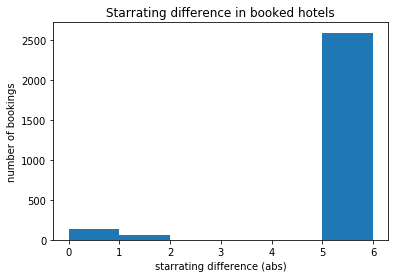

In [79]:
plt.hist(sb_samples_f.loc[sb_samples_f.booking_bool == 1][:]["starrating_diff"], bins = range(0,6+plot_with_na))
plt.xlabel("starrating difference (abs)")
plt.ylabel("number of bookings")
plt.title("Starrating difference in booked hotels")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


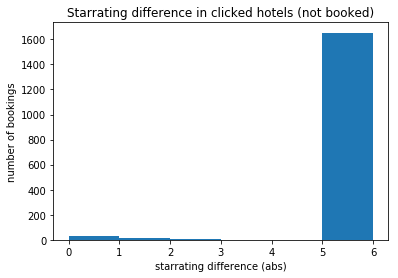

In [80]:
plt.hist(sb_samples_f.loc[sb_samples_f.click_bool == 1][sb_samples_f.booking_bool ==0][:]["starrating_diff"], bins = range(0,6+plot_with_na))
plt.xlabel("starrating difference (abs)")
plt.ylabel("number of bookings")
plt.title("Starrating difference in clicked hotels (not booked)")
plt.show()

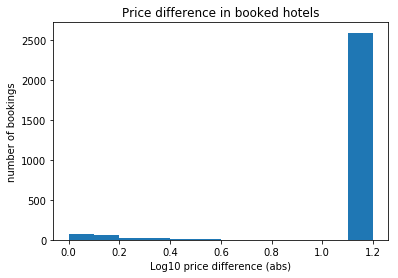

In [81]:
plt.hist(sb_samples_f.loc[sb_samples_f.booking_bool == 1][:]["usd_diff"], bins = np.arange(0,1.1+plot_with_na/10,0.1))
plt.xlabel("Log10 price difference (abs)")
plt.ylabel("number of bookings")
plt.title("Price difference in booked hotels")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


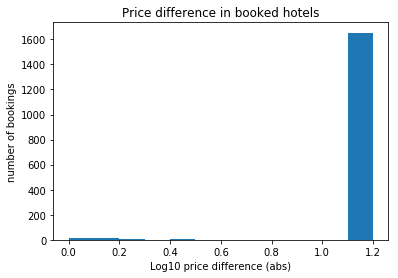

In [82]:
plt.hist(sb_samples_f.loc[sb_samples_f.click_bool == 1][sb_samples_f.booking_bool==0][:]["usd_diff"], bins = np.arange(0,1.1+plot_with_na/10,0.1))
plt.xlabel("Log10 price difference (abs)")
plt.ylabel("number of bookings")
plt.title("Price difference in booked hotels")
plt.show()

In [142]:
# Hotel quality
## times booked / times in the data
## times clicked / times in the data

hotel_quality = pd.DataFrame(sb_samples.prop_id.value_counts(dropna = False))
print(hotel_quality.head())
hotel_quality = hotel_quality.join(pd.DataFrame(sb_samples.prop_id[sb_samples.booking_bool == 1].value_counts().astype(int)), rsuffix = "book")
hotel_quality = hotel_quality.join(pd.DataFrame(sb_samples.prop_id[sb_samples.click_bool == 1].value_counts().astype(int)), rsuffix = "click")
hotel_quality.columns = ["count", "booked", "clicked"]


print(hotel_quality.head())


        prop_id
104517       54
21018        54
124342       54
137997       54
40279        53
53494     5
22578     4
77845     4
116942    4
137997    4
11297     4
134154    4
99025     4
50215     3
27864     3
126657    3
63854     3
45277     3
64949     3
37543     3
61529     3
21198     3
136833    3
10429     3
133003    3
21018     3
44372     3
54077     3
126732    3
62152     3
53547     3
138600    3
43924     3
47786     3
88218     3
         ..
117308    1
113208    1
90679     1
100918    1
49717     1
86813     1
23090     1
125488    1
57903     1
82477     1
49733     1
127561    1
50013     1
59978     1
49761     1
12467     1
19740     1
100939    1
119387    1
68186     1
133720    1
12887     1
139861    1
4691      1
129618    1
100944    1
8783      1
129614    1
131661    1
10243     1
Name: prop_id, Length: 2557, dtype: int32
        count  booked  clicked
104517     54     2.0      3.0
21018      54     3.0      7.0
124342     54     1.0      1.0
137997

In [ ]:
#Roomcount_Bookwindow
#Adultcount_Childrencount
#Average comp price